### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()
co_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [2]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']

In [3]:
co_df

,invoice,code,description,quantity,date,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# 결측치 확인 
co_df.isnull().sum()
# 확인 결과 -> description에 1454개, 고객 id에 135080개 발견 

invoice             0
code                0
description      1454
quantity            0
date                0
price               0
id             135080
country             0
dtype: int64

In [5]:
# description 컬럼을 제거 
co_df.drop(columns=['description'], inplace=True)
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
# description 결측치 제거 후 확인 결과 
co_df.isnull().sum()

invoice          0
code             0
quantity         0
date             0
price            0
id          135080
country          0
dtype: int64

In [7]:
# 고객 아이디의 개수 확인 -> 406829개 발견 
co_df['id'].value_counts()
# co_df['id'].count()

id
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
co_df[["id"]].describe().T # 고객 id 컬럼에 대한 통계량을 계산 하고 전치 행렬 처리함 

,count,mean,std,min,25%,50%,75%,max
id,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [9]:
# 5270 개의 중복된 행이 있다는 결과가 나옴 
co_df.duplicated().sum() 

5270

In [10]:
# 고객 ID 정보의 수는 매우 많고, 중복된 부분도 많기 때문에 우선 중복된 고객 정보를 지우고 하나로 초기화 하였습니다.
# co_df = co_df.drop_duplicates(subset=['id'])
# co_df['id'].value_counts()
# 확인해보니 고객 id는 중복이 많지만, code, invoice code 등 고유하게 작용하는 특성들은 서로 다르기 때문에 지우지 않기로했습니다.

In [11]:
co_df[["id"]].describe().T
 # 데이터 수와 평균,표준편차, 최소,최대값, 사분위 분포도 추출

,count,mean,std,min,25%,50%,75%,max
id,406829.0,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0


In [12]:
# 최종 결측치 확인 결과 
co_df.isnull().sum()

# id 결측치가 하나 남은 것을 확인
missing_id = co_df[co_df['id'].isnull()]
print(missing_id)


       invoice    code  quantity             date    price  id         country
622     536414   22139        56  12/1/2010 11:52     0.00 NaN  United Kingdom
1443    536544   21773         1  12/1/2010 14:32     2.51 NaN  United Kingdom
1444    536544   21774         2  12/1/2010 14:32     2.51 NaN  United Kingdom
1445    536544   21786         4  12/1/2010 14:32     0.85 NaN  United Kingdom
1446    536544   21787         2  12/1/2010 14:32     1.66 NaN  United Kingdom
...        ...     ...       ...              ...      ...  ..             ...
541536  581498  85099B         5  12/9/2011 10:26     4.13 NaN  United Kingdom
541537  581498  85099C         4  12/9/2011 10:26     4.13 NaN  United Kingdom
541538  581498   85150         1  12/9/2011 10:26     4.96 NaN  United Kingdom
541539  581498   85174         1  12/9/2011 10:26    10.79 NaN  United Kingdom
541540  581498     DOT         1  12/9/2011 10:26  1714.17 NaN  United Kingdom

[135080 rows x 7 columns]


In [13]:
# 데이터 프레임 데이터수 재확인 
co_df.value_counts()

invoice  code   quantity  date              price  id       country       
555524   22698   1        6/5/2011 11:37    2.95   16923.0  United Kingdom    20
         22697   1        6/5/2011 11:37    2.95   16923.0  United Kingdom    12
572861   22775   12       10/26/2011 12:46  1.25   14102.0  United Kingdom     8
572344   M       48       10/24/2011 10:43  1.50   14607.0  United Kingdom     6
578289   23395   1        11/23/2011 14:07  3.75   17841.0  United Kingdom     6
                                                                              ..
553915   21165   12       5/19/2011 19:51   1.69   18225.0  United Kingdom     1
         21080   12       5/19/2011 19:51   0.85   18225.0  United Kingdom     1
         21078   12       5/19/2011 19:51   0.85   18225.0  United Kingdom     1
553913   85152   3        5/19/2011 19:47   2.10   18109.0  United Kingdom     1
C581569  84978  -1        12/9/2011 11:58   1.25   17315.0  United Kingdom     1
Name: count, Length: 401602, dtype

In [14]:
# 무엇을 기준점으로 삼을 것인가 -> 결제 금액을 기준으로 이상치를 제거 할 것이다.
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 8.45


In [15]:
# 우선 수량이 음수인 경우도 있으므로 이를 제거 
co_df = co_df[co_df['quantity'] >= 0]
co_df

,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
co_df[co_df['price'] > upper_bound] # 이상치 검사 (최대범위보다 큰 경우)

# 이상치 제거 
co_df = co_df[co_df['price'] <= upper_bound]

In [17]:
# 날짜 형식을 년/월/일로 바꿈
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

C:\Users\user\AppData\Local\Temp\ipykernel_11412\2981504380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')


,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011/12/09,0.85,12680.0,France
541905,581587,22899,6,2011/12/09,2.10,12680.0,France
541906,581587,23254,4,2011/12/09,4.15,12680.0,France
541907,581587,23255,4,2011/12/09,4.15,12680.0,France


In [18]:
# 'date' 열을 복사하여 새로운 데이터프레임에 할당
co_df_copy = co_df.copy()

# 'date' 열의 값을 일 수로 변환하여 새로운 열에 저장 (최신날짜에서 빼줌으로써, Recency를 구할 때 정확한 값으로 구할 수 있음)
co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


# 결과 확인
print(co_df)
co_df

       invoice    code  quantity  date  price       id         country
0       536365  85123A         6   373   2.55  17850.0  United Kingdom
1       536365   71053         6   373   3.39  17850.0  United Kingdom
2       536365  84406B         8   373   2.75  17850.0  United Kingdom
3       536365  84029G         6   373   3.39  17850.0  United Kingdom
4       536365  84029E         6   373   3.39  17850.0  United Kingdom
...        ...     ...       ...   ...    ...      ...             ...
541904  581587   22613        12     0   0.85  12680.0          France
541905  581587   22899         6     0   2.10  12680.0          France
541906  581587   23254         4     0   4.15  12680.0          France
541907  581587   23255         4     0   4.15  12680.0          France
541908  581587   22138         3     0   4.95  12680.0          France

[493286 rows x 7 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_11412\1091558251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


,invoice,code,quantity,date,price,id,country
0,536365,85123A,6,373,2.55,17850.0,United Kingdom
1,536365,71053,6,373,3.39,17850.0,United Kingdom
2,536365,84406B,8,373,2.75,17850.0,United Kingdom
3,536365,84029G,6,373,3.39,17850.0,United Kingdom
4,536365,84029E,6,373,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,0,0.85,12680.0,France
541905,581587,22899,6,0,2.10,12680.0,France
541906,581587,23254,4,0,4.15,12680.0,France
541907,581587,23255,4,0,4.15,12680.0,France


### date의 값이 클 수록 더 예전에 거래한 내용임을 확인 할 수 있음

In [19]:
# Recency 구하기 
# 날짜의 가장 최소값을 가져옴 (즉 각 id에서 가장 최신 날짜를 불러옴)
rfm_r = co_df.groupby('id')['date'].min().reset_index()
rfm_r.columns = ['id', 'Recency']
rfm_r

,id,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4308,18280.0,277
4309,18281.0,180
4310,18282.0,7
4311,18283.0,3


In [20]:
#Frequency 구하기 
# 중복된 고객 id를 지웠기 때문에, id의 수를 가져오는 것보다 종속변수로 있는 quantity를 빈도수로 가져올 수 있음 
rfm_f = co_df.groupby('id')['quantity'].sum().reset_index()
rfm_f.columns = ['id', 'Frequency']
rfm_f
# 확인 결과 id가 12346인 회원이 굉장히 많은 빈도수를 차지하는 것을 알 수 있으며, VIP 회원이 될 가능성이 매우 높음 

,id,Frequency
0,12346.0,74215
1,12347.0,2439
2,12348.0,2332
3,12349.0,619
4,12350.0,196
...,...,...
4308,18280.0,43
4309,18281.0,52
4310,18282.0,99
4311,18283.0,1393


In [21]:
# # Monetary 구하기 
rfm_m = co_df.groupby('id')['price'].sum().reset_index()
rfm_m.columns = ['id', 'Monetary']
rfm_m
# 그러나 Monetary를 분석한 결과 12346의 id를 가진 회원은 Monetary 부분에서 그리 높지 않은 점수를 볼 수 있다.

,id,Monetary
0,12346.0,1.04
1,12347.0,410.31
2,12348.0,18.71
3,12349.0,203.25
4,12350.0,25.30
...,...,...
4308,18280.0,37.70
4309,18281.0,5.46
4310,18282.0,24.14
4311,18283.0,1178.03


In [22]:
# RFM 결과를 rfm이라는 데이터 프레임에  합친다.
rfm = pd.merge(rfm_r, rfm_m, on='id')
rfm = pd.merge(rfm, rfm_f, on='id')
rfm

,id,Recency,Monetary,Frequency
0,12346.0,325,1.04,74215
1,12347.0,2,410.31,2439
2,12348.0,75,18.71,2332
3,12349.0,18,203.25,619
4,12350.0,310,25.30,196
...,...,...,...,...
4308,18280.0,277,37.70,43
4309,18281.0,180,5.46,52
4310,18282.0,7,24.14,99
4311,18283.0,3,1178.03,1393


In [23]:
# 정규화 진행
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [24]:
rfm

,id,Recency,Monetary,Frequency
0,12346.0,0.871314,0.000064,0.377987
1,12347.0,0.005362,0.025155,0.012417
2,12348.0,0.201072,0.001147,0.011872
3,12349.0,0.048257,0.012461,0.003148
4,12350.0,0.831099,0.001551,0.000993
...,...,...,...,...
4308,18280.0,0.742627,0.002311,0.000214
4309,18281.0,0.482574,0.000335,0.000260
4310,18282.0,0.018767,0.001480,0.000499
4311,18283.0,0.008043,0.072222,0.007090


In [25]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,id,Recency,Monetary,Frequency
0,12346.0,0.128686,0.000064,0.377987
1,12347.0,0.994638,0.025155,0.012417
2,12348.0,0.798928,0.001147,0.011872
3,12349.0,0.951743,0.012461,0.003148
4,12350.0,0.168901,0.001551,0.000993
...,...,...,...,...
4308,18280.0,0.257373,0.002311,0.000214
4309,18281.0,0.517426,0.000335,0.000260
4310,18282.0,0.981233,0.001480,0.000499
4311,18283.0,0.991957,0.072222,0.007090


In [26]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,id,Recency,Monetary,Frequency,TotalScore
0,12346.0,0.128686,0.000064,0.377987,0.506737
1,12347.0,0.994638,0.025155,0.012417,1.032210
2,12348.0,0.798928,0.001147,0.011872,0.811947
3,12349.0,0.951743,0.012461,0.003148,0.967351
4,12350.0,0.168901,0.001551,0.000993,0.171445
...,...,...,...,...,...
4308,18280.0,0.257373,0.002311,0.000214,0.259898
4309,18281.0,0.517426,0.000335,0.000260,0.518021
4310,18282.0,0.981233,0.001480,0.000499,0.983212
4311,18283.0,0.991957,0.072222,0.007090,1.071269


In [27]:
co_rfm_df = pd.merge(co_df, rfm, on='id')
co_rfm_df

,invoice,code,quantity,date,price,id,country,Recency,Monetary,Frequency,TotalScore
0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.002681,0.054578,0.008735,0.065994
1,536365,71053,6,373,3.39,17850.0,United Kingdom,0.002681,0.054578,0.008735,0.065994
2,536365,84406B,8,373,2.75,17850.0,United Kingdom,0.002681,0.054578,0.008735,0.065994
3,536365,84029G,6,373,3.39,17850.0,United Kingdom,0.002681,0.054578,0.008735,0.065994
4,536365,84029E,6,373,3.39,17850.0,United Kingdom,0.002681,0.054578,0.008735,0.065994
...,...,...,...,...,...,...,...,...,...,...,...
375222,581578,22993,12,0,1.25,12713.0,Germany,1.000000,0.003996,0.002536,1.006532
375223,581578,22907,12,0,0.85,12713.0,Germany,1.000000,0.003996,0.002536,1.006532
375224,581578,22908,12,0,0.85,12713.0,Germany,1.000000,0.003996,0.002536,1.006532
375225,581578,23215,12,0,2.08,12713.0,Germany,1.000000,0.003996,0.002536,1.006532


In [28]:
# 'price', 'date', 'quantity', 'TotalScore' 열에 대해서는 평균(mean)을 구하며
# 'code', 'invoice', 'country' 열에 대해서는 최빈값(mode)을 구합니다. 
# 최빈값은 각 그룹 내에서 가장 자주 등장하는 값을 의미한다.
real_df = co_rfm_df.groupby('id').apply(lambda x: pd.Series({
    'price': x['price'].mean(),
    'date': x['date'].mean(), 
    'quantity': x['quantity'].mean(),
    'TotalScore' : x['TotalScore'].mean(),
    'code': x['code'].mode()[0],  # 최빈값을 구하기 위해 mode 함수 사용
    'invoice': x['invoice'].mode()[0],
    'country' : x['country'].mode()[0]
})).reset_index()

display(real_df)

,id,price,date,quantity,TotalScore,code,invoice,country
0,12346.0,1.040000,325.000000,74215.000000,0.506737,23166,541431,United Kingdom
1,12347.0,2.331307,190.386364,13.857955,1.032210,22375,573511,Iceland
2,12348.0,0.692963,313.333333,86.370370,0.811947,21213,539318,Finland
3,12349.0,3.079545,18.000000,9.378788,0.967351,20685,577609,Italy
4,12350.0,1.581250,310.000000,12.250000,0.171445,20615,543037,Norway
...,...,...,...,...,...,...,...,...
4308,18280.0,4.188889,277.000000,4.777778,0.259898,22084,545712,United Kingdom
4309,18281.0,1.092000,180.000000,10.400000,0.518021,22028,556464,United Kingdom
4310,18282.0,2.682222,73.111111,11.000000,0.983212,21108,562525,United Kingdom
4311,18283.0,1.566529,134.219415,1.852394,1.071269,20719,578262,United Kingdom


In [29]:
id_3995_mean_quantity = co_df[co_df['id'] == 17850.0]['quantity'].mean()
print(id_3995_mean_quantity)


5.937716262975779


In [30]:
# TotalScore의 범위를 정한다.
# 대략적으로 각각 6 정도의 범위를 가진다.
import numpy as np

l1, l2, l3, l4 = np.percentile(real_df['TotalScore'], [20, 55, 80, 90])
print(l1, l2, l3)

0.5295857258514659 0.9054581587819708 0.9853552161170703


In [31]:
# 각 범위에 따라 레벨을 나눈다.
def get_level(x):
    if x < l1:
        return 5
    if x > l1 and x <= l2:
        return 4
    if x > l2 and x <= l3 :
        return 3
    if x > l3 and x <= l4 :
        return 2
    return 1

In [32]:
real_df['Level'] = real_df['TotalScore'].apply(get_level)
real_df

,id,price,date,quantity,TotalScore,code,invoice,country,Level
0,12346.0,1.040000,325.000000,74215.000000,0.506737,23166,541431,United Kingdom,5
1,12347.0,2.331307,190.386364,13.857955,1.032210,22375,573511,Iceland,1
2,12348.0,0.692963,313.333333,86.370370,0.811947,21213,539318,Finland,4
3,12349.0,3.079545,18.000000,9.378788,0.967351,20685,577609,Italy,3
4,12350.0,1.581250,310.000000,12.250000,0.171445,20615,543037,Norway,5
...,...,...,...,...,...,...,...,...,...
4308,18280.0,4.188889,277.000000,4.777778,0.259898,22084,545712,United Kingdom,5
4309,18281.0,1.092000,180.000000,10.400000,0.518021,22028,556464,United Kingdom,5
4310,18282.0,2.682222,73.111111,11.000000,0.983212,21108,562525,United Kingdom,3
4311,18283.0,1.566529,134.219415,1.852394,1.071269,20719,578262,United Kingdom,1


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

real_df['Level'] = real_df['Level'].replace([5,4,3,2,1], ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP'])
real_df


,id,price,date,quantity,TotalScore,code,invoice,country,Level
0,12346.0,1.040000,325.000000,74215.000000,0.506737,23166,541431,United Kingdom,Bronze
1,12347.0,2.331307,190.386364,13.857955,1.032210,22375,573511,Iceland,VIP
2,12348.0,0.692963,313.333333,86.370370,0.811947,21213,539318,Finland,Sliver
3,12349.0,3.079545,18.000000,9.378788,0.967351,20685,577609,Italy,Gold
4,12350.0,1.581250,310.000000,12.250000,0.171445,20615,543037,Norway,Bronze
...,...,...,...,...,...,...,...,...,...
4308,18280.0,4.188889,277.000000,4.777778,0.259898,22084,545712,United Kingdom,Bronze
4309,18281.0,1.092000,180.000000,10.400000,0.518021,22028,556464,United Kingdom,Bronze
4310,18282.0,2.682222,73.111111,11.000000,0.983212,21108,562525,United Kingdom,Gold
4311,18283.0,1.566529,134.219415,1.852394,1.071269,20719,578262,United Kingdom,VIP


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

print(real_df['Level'].value_counts())

Level
Sliver     1509
Gold       1078
Bronze      863
VIP         432
Diamond     431
Name: count, dtype: int64


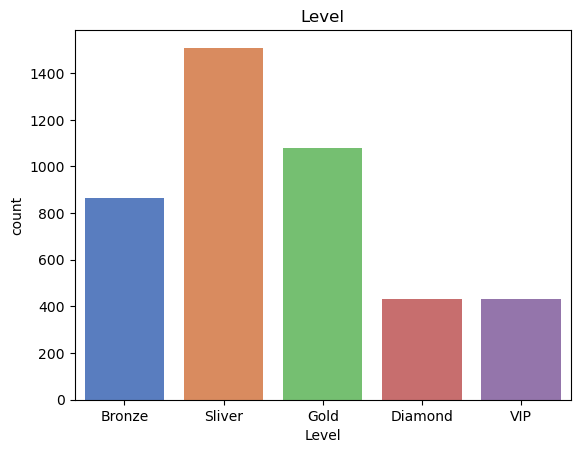

In [35]:
sns.countplot(x='Level', data=real_df, palette='muted', order=order)
plt.title('Level')
plt.show()

### 차트 시각화 자료 분석 결과 
각 회원의 등급을 시각화 자료로 분석한 결과 VIP, 다이아몬드의 회원 등급 거의 동일한 수준의 분포를 보이고 있으며,
가장 많은 분포를 가진 회원 등급은 실버 등급의 회원들이고, 가장 하위의 분포를 가진 회원 등급은 다이아몬드,VIP 회원들이였습니다.
그러나 각 국가에 따라서 이러한 멤버 등급은 서로 다를 수 있으며, 이 점을 유의하여 국가별로 멤버 등급을 분석하는 것이 더 중요할 것입니다.

### 💡 결론
실버 회원들의 특성 및 구매 패턴, 그리고 다이아 및 VIP 회원들의 혜택 및 서비스에 대한 분석이 필요할 것으로 보입니다. 또한, 이러한 분석을 토대로 VIP 회원들의 수를 늘리고, 실 등급 회원들을 유지하며 신규 고객을 유치하는 전략을 수립할 필요가 있을 것입니다.





In [36]:
real_df['country'].value_counts()
# 영국의 데이터 수가 압도적으로 많은 것으로 미루어보아 아마 영국 내 기업인 것으로 예상

country
United Kingdom          3896
Germany                   94
France                    87
Spain                     29
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     14
Finland                   12
Norway                    10
Austria                    9
Channel Islands            9
Australia                  9
Sweden                     8
Netherlands                8
Japan                      8
Denmark                    8
Cyprus                     6
Poland                     6
USA                        4
Canada                     4
Greece                     4
Unspecified                4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech 

In [37]:
price = real_df.groupby('country')['TotalScore'].sum().sort_values(ascending=False)
print(price)
# 국가별 RFM 통계 합산 = 영국,독일,프랑스,스페인,벨기에,스위스,포르투갈,핀란드,이탈리아 ...

country
United Kingdom          3011.048602
Germany                   76.174048
France                    67.777963
Spain                     23.533556
Belgium                   17.832037
Switzerland               14.237166
Portugal                  12.811181
Finland                   10.318555
Italy                      9.987843
Norway                     8.498738
Australia                  7.206854
Denmark                    7.108694
Netherlands                6.992410
Sweden                     6.717632
Channel Islands            5.790776
Austria                    5.564318
Japan                      5.420424
Poland                     4.606106
EIRE                       4.265093
Cyprus                     4.001851
USA                        3.216859
Unspecified                2.637328
Israel                     2.174922
Canada                     2.029286
Greece                     2.011693
Malta                      1.650211
Iceland                    1.032210
United Arab Emirates

In [38]:
price = real_df.groupby('country')['price'].sum().sort_values(ascending=False)
print(price)

country
United Kingdom          9515.164975
Germany                  213.926206
France                   192.956709
Spain                     65.994045
Belgium                   53.939756
Switzerland               52.577010
Portugal                  43.264320
Italy                     41.220201
Finland                   28.021399
Channel Islands           27.534482
Norway                    24.838218
Australia                 24.263995
Austria                   22.420903
Denmark                   20.230563
Cyprus                    18.663252
Poland                    16.748698
Sweden                    16.243161
Netherlands               15.748095
Japan                     14.357969
Greece                    12.035189
Unspecified                9.959635
USA                        8.156223
EIRE                       7.758567
Israel                     6.931486
Canada                     5.939780
Malta                      5.499084
Bahrain                    5.104545
United Arab Emirates

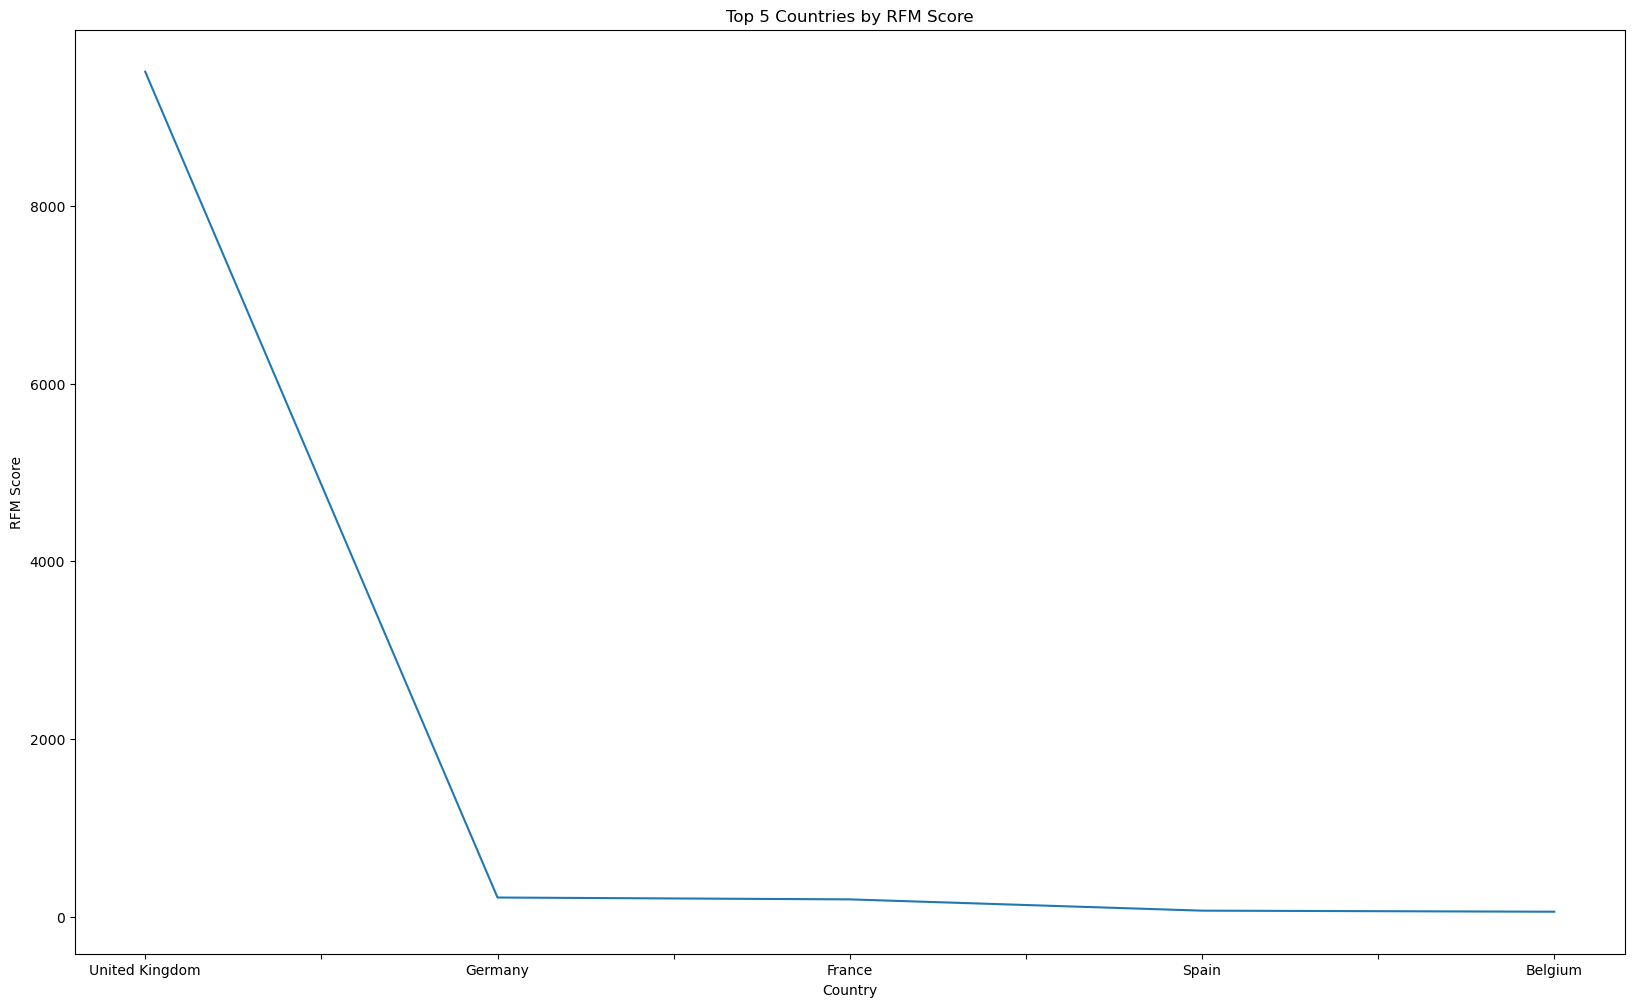

In [39]:
fig, axes = plt.subplots(1, figsize=(20, 12))

# 각 나라별로 RFM 점수를 합산 (상위 5개 국가 추출)
price_by_country = real_df.groupby('country')['price'].sum().nlargest(5)
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 시각화
price_by_country.plot(kind='line', ax=axes)
axes.set_title('Top 5 Countries by RFM Score')
axes.set_xlabel('Country')
axes.set_ylabel('RFM Score')
plt.show()


총 결제금액 합산 역시 영국이 압도적으로 많은 것을 확인 할 수 있으며, 그 다음으로 프랑스, 독일, 스페인, 벨기에 순으로 많은 것을 알 수 있습니다.

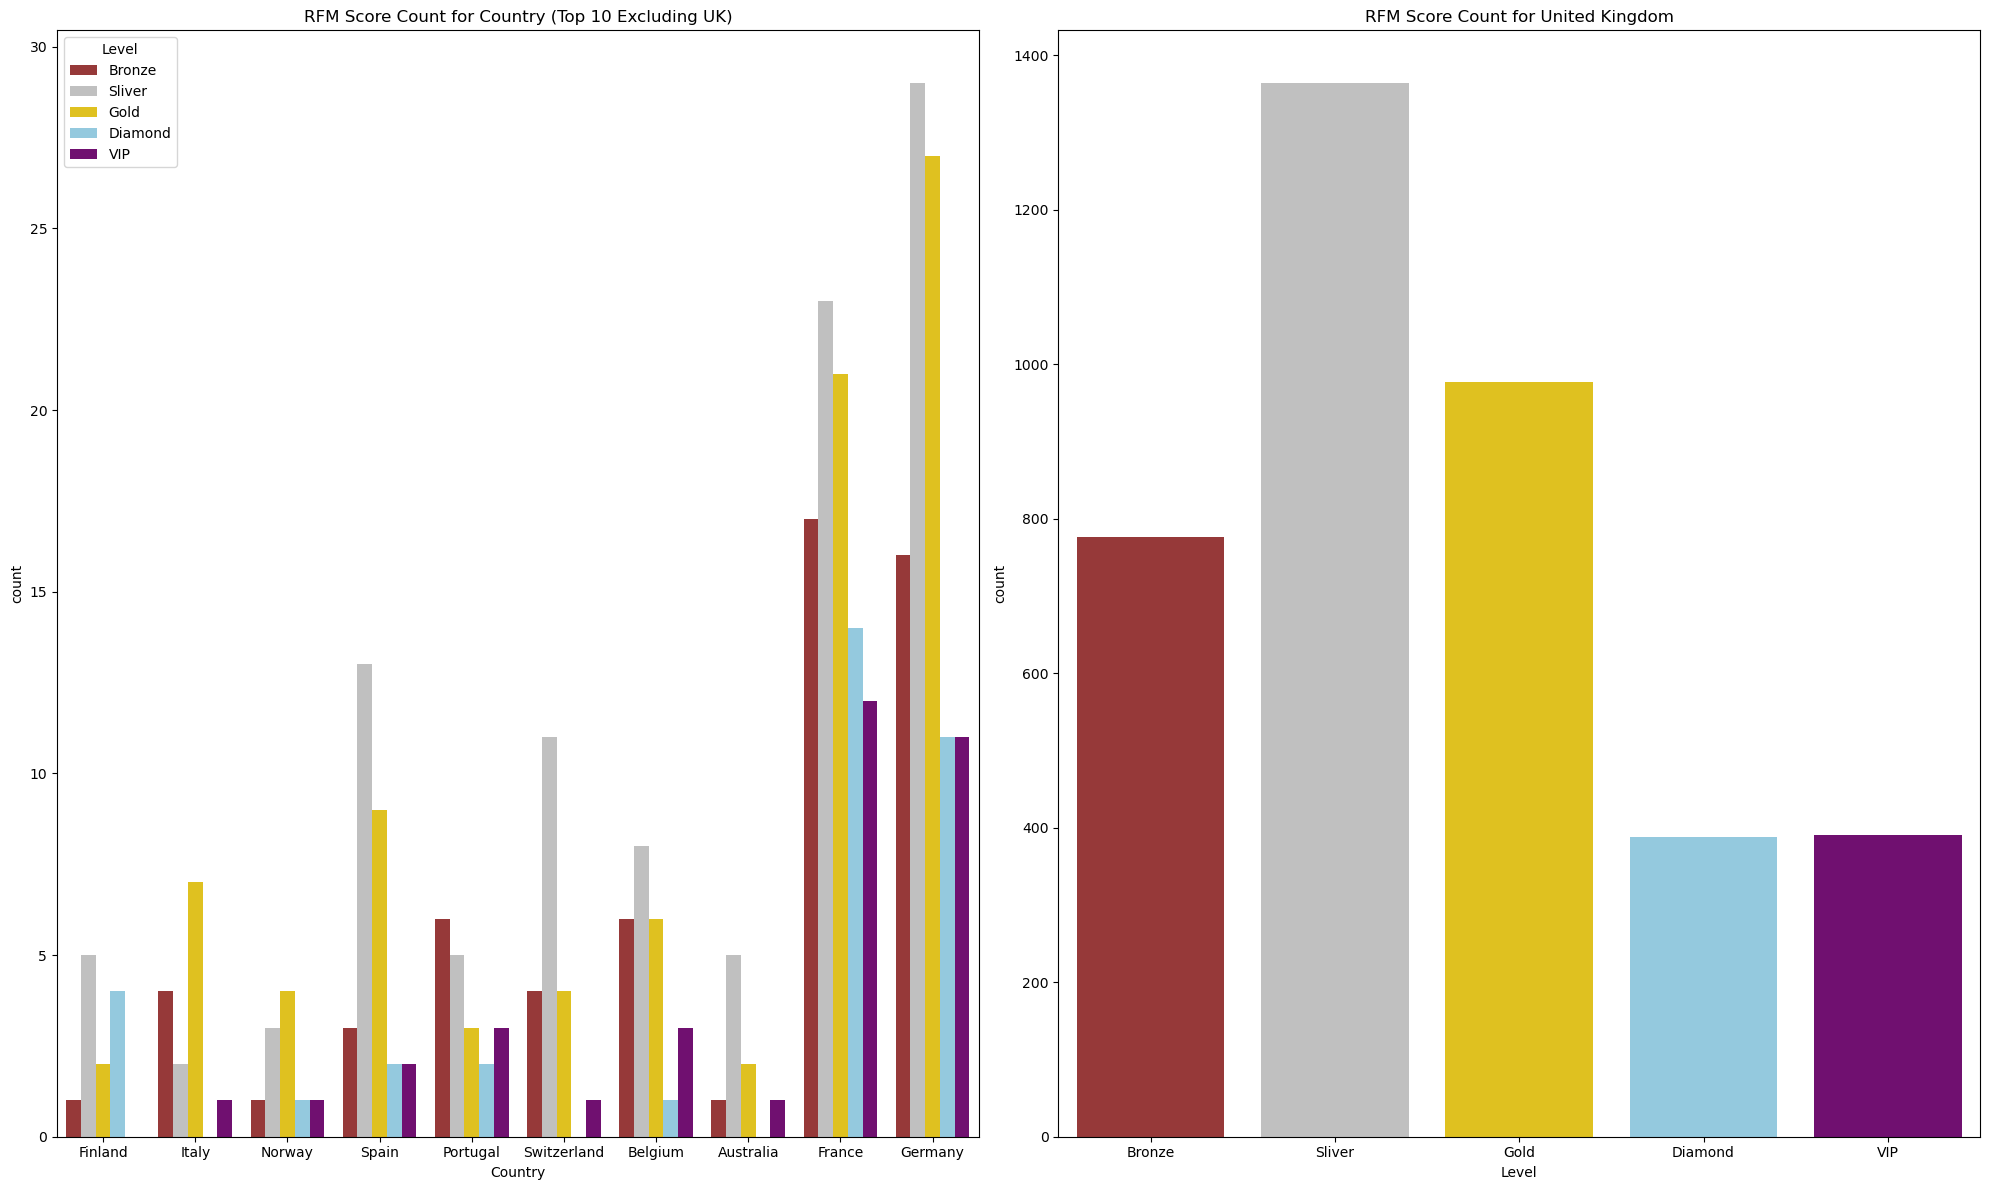

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(10).index
# nlargest() = 열을 기준으로 가장 큰 값을 가지는 요소들을 선택하는 메서드이며, 가장 큰 값을 가지는 
#상위 N개의 요소를 선택할 때 사용함

# 영국을 제외한 상위 10개 국가 선택 (영국 국적을 가진 회원들의 수가 매우 많기 때문에)
# 인덱스 슬라이싱을 사용하여 영국을 제외한 상위 10개 국가 추출 
top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().index[:10]

# 상위 10개 국가에 해당하는 데이터 필터링
filtered_df = real_df[real_df['country'].isin(top_countries)]

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 왼쪽 그래프: 영국을 제외한 상위 10개 국가에 대한 등급별 RFM 합산 차트 시각화
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('RFM Score Count for Country (Top 10 Excluding UK)')
axes[0].set_xlabel('Country')

# 오른쪽 그래프: 영국(United Kingdom)에 대한 등급별 RFM 합산 차트 시각화 
uk_df = real_df[real_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', order=order_columns, data=uk_df, palette=colors)
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()

### 🌏 해외 마케팅 전략
> (영국 내 기업인 것으로 판단하여, 영국을 제외한 상위 10개 국가에 대한 마케팅 전략 분석)

#### <img src="./images/germany.png" width="30px"> 독일 마케팅 전략
- 독일에서는 골드 등급 회원들이 가장 많은 것으로 나타났으므로, 독일 시장에서는 골드 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 골드 등급 회원들은 높은 구매율과 충성도를 보이기 때문에, 특별한 혜택이나 프리미엄 서비스를 제공하여 이탈을 방지하고 브랜드 충성도를 높일 수 있습니다.
- 실버 등급 회원도 상당한 수를 차지하고 있으므로, 이들에게도 주의를 기울일 필요가 있습니다.
- 실버 등급 회원들에게는 추가 혜택을 제공하여 충성도를 높이고, 상위 등급으로의 등급 업그레이드를 유도하여 수익을 창출 할 수 있습니다.
- 다이아몬드 등급의 회원도 브론즈,VIP 회원 보다 많은 수치를 기록하였으므로 다이아몬드 등급 회원들에게는 특별 프로모션을 제공하여, 수익성을 창출할 수 있습니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 중점을 두어야 합니다.
- 브론즈 및 VIP 등급 회원들을 대상으로 한 특별한 혜택이나 프로모션을 제공하여 등급 업그레이드를 유도할 수 있습니다.

#### <img src="./images/france.png" width="30px"> 프랑스 마케팅 전략
- 가장 많은 회원이 실버 등급이므로, 프랑스 시장에서는 실버 등급 회원들을 주요 타겟으로 삼을 수 있습니다.
- 실버 등급 회원들에게는 할인 혜택이나 특별한 혜택을 제공하여 충성도를 높일 수 있습니다.
- 골드 및 다이아몬드 등급과 같은 상위 등급의 회원들도 상당수를 차지하고 있으므로, 이들에게 추가 혜택을 제공하여 이탈을 방지하고 충성도를 높일 수 있습니다.
- 특히 이러한 상위 등급의 고객의 경우 기업의 핵심 고객이기 때문에, 프리미엄 서비스나 제품을 홍보하고 이와 같은 마케팅을 프랑스 내의 골드 및 다이아몬드 회원들을 위해 마케팅 전략을 확장하여야 합니다.
- 브론즈 및 VIP 등급 회원의 수가 상대적으로 적은 것으로 나타났으므로, 이들을 늘리는 데에 초점을 맞출 필요가 있습니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 등급 업그레이드를 유도할 수 있습니다.
- VIP 등급 회원들에게는 특별 프로모션을 제공하여 이탈을 방지하고 이전보다 높은 수익을 창출 할 수 있습니다.
  

#### 위의 전략들을 적용하여 상위 2개의 국가 시장에서 브랜드의 인지도를 높이고 고객들의 충성도를 높일 수 있을 것입니다.
- 독일 프랑스 다음으로 RFM 합산 점수가 높았던 국가로는 스페인, 스위스, 벨기에 순이였습니다. 
- 이 3개의 국가들의 경우 각 멤버별 등급이 각기 달랐으며, 이를 통계로 나머지 국가들에 대해서 분석을 하였습니다.

#### <img src="./images/spain.png" width="30px"> 스페인 마케팅 전략
- 스페인은 실버 등급 회원들이 가장 높은 비중을 차지하였고, 그 다음으로 골드 등급의 회원들이 높은 비중을 차지 하였습니다.  그리고 스페인에서는 다이아 및 VIP 등급의 회원들이 브론즈 등급의 회원들의 수보다 많은 것을 알 수 있습니다.  이를 바탕으로 다이아몬드 등급 회원들에게 높은 서비스 품질과 개인화된 경험을 제공하여 이들의 만족도를 높일 수 있습니다.

#### <img src="./images/swice.png" width="30px"> 스위스 마케팅 전략
- 스위스는 골드 등급의 회원들이 가장 많이 분포되어있었고,, 이러한 골드 등급 회원들에게는 추가 혜택 및 프로모션을 제공하여 상위 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야합니다.
- 
#### <img src="./images/bel.png" width="30px"> 벨기에 마케팅 전략
- 그 다음 벨기에의 경우 압도적으로 실버 등급의 회원들이 가장 많았으며 실버 등급의 회원들에게는 추가 혜택 및 프로모션을 제공하여 골드 등급으로의 업그레이드를 유도하고 이탈을 방지하여야 하는 마케팅 전략을 세워야합니다. 


### 결론 
상위 10개 국가 중 가장 높은 RFM 점수를 기록한 독일과 프랑스에 집중적인 마케팅 전략을 펼쳐야 하며, 나머지 국가 들에 대해서도 앞서 분석한 개별 국가에 대한 마케팅 전략을 참고하여 각 국가의 특성과 회원 등급 분포에 맞춰 맞춤형 마케팅 전략을 도입하여야 합니다.

In [41]:
spain_df = real_df[real_df['country'] == 'Spain']
spain_df["Level"].value_counts()


Level
Sliver     13
Gold        9
Bronze      3
Diamond     2
VIP         2
Name: count, dtype: int64

In [42]:
swice_df = real_df[real_df['country'] == 'Belgium']
swice_df["Level"].value_counts()


Level
Sliver     8
Bronze     6
Gold       6
VIP        3
Diamond    1
Name: count, dtype: int64

### <img src="./images/uk.png" width="30px"> 영국 내 마케팅 전략 
> RFM 분석 결과 가장 많은 비중을 차지한 영국의 경우 골드 등급의 회원들이 가장 많은 것을 확인 할 수 있으며,

> 그 다음으로 브론즈, 다이아몬드, 실버 , VIP 등급 순으로 회원들의 등급이 분포 되있는 것을 확인 할 수 있었습니다.

#### 골드 등급 회원 타겟팅
- 골드 등급 회원이 가장 많은 것으로 나타났으므로, 골드 등급 회원을 중점적으로 타겟으로 삼습니다.
- 골드 등급 회원들은 이미 높은 충성도를 보이는 고객이므로, 추가 혜택을 제공하여 그들의 충성도를 유지하고 이탈을 방지합니다.
- 골드 등급 회원들을 대상으로 한 특별 프로모션, 할인 혜택 등을 제공하여 그들의 만족도를 높이고 추가 구매를 유도합니다.
#### 브론즈 및 다이아몬드, 실버, VIP 등급 회원 타겟팅
- 골드 등급 이외의 회원들에게도 주의를 기울이며, 각 등급에 맞는 특별한 혜택을 제공합니다.
- 브론즈 등급 회원에게는 등급 업그레이드를 유도하는 혜택을 제공하여 충성도를 높입니다.
- VIP 등급 회원들에게는 VIP 서비스, 이벤트 초대 등 고급 서비스를 제공하여 수익성을 향상시킵니다.
- 다이아몬드 등급 회원들에게는 VIP 등급으로의 업그레이드를 유도하여 특별 프로모션을 제공하거나 할인 혜택을 제공합니다.
- 브론즈 등급 회원들에게는 특별한 할인 혜택을 제공하여 이탈을 방지하고, 이들을 늘리는 데에 중점을 두어야 합니다.
#### 결론 
각 등급의 회원들에게 위와 같은 맞춤형 마케팅 캠페인을 실행하고, 이러한 전략을 통해 영국 내 고객들의 충성도를 높이고 매출을 증가시킬 수 있습니다.

In [43]:
real_df.groupby('Level')['code'].value_counts()
real_df['code'].value_counts()

real_df.groupby('code')['country'].value_counts()

code    country       
10002   Germany           1
10080   United Kingdom    1
10120   United Kingdom    1
10125   Germany           2
        France            1
                         ..
85202   United Kingdom    1
90012A  United Kingdom    1
90199C  United Kingdom    1
M       United Kingdom    4
        Germany           1
Name: count, Length: 1439, dtype: int64

In [45]:
real_df['code'].value_counts().index[:10]

Index(['21034', '20914', '20725', '85123A', '22197', '15036', '85099B',
       '20685', '22086', '22178'],
      dtype='object', name='code')

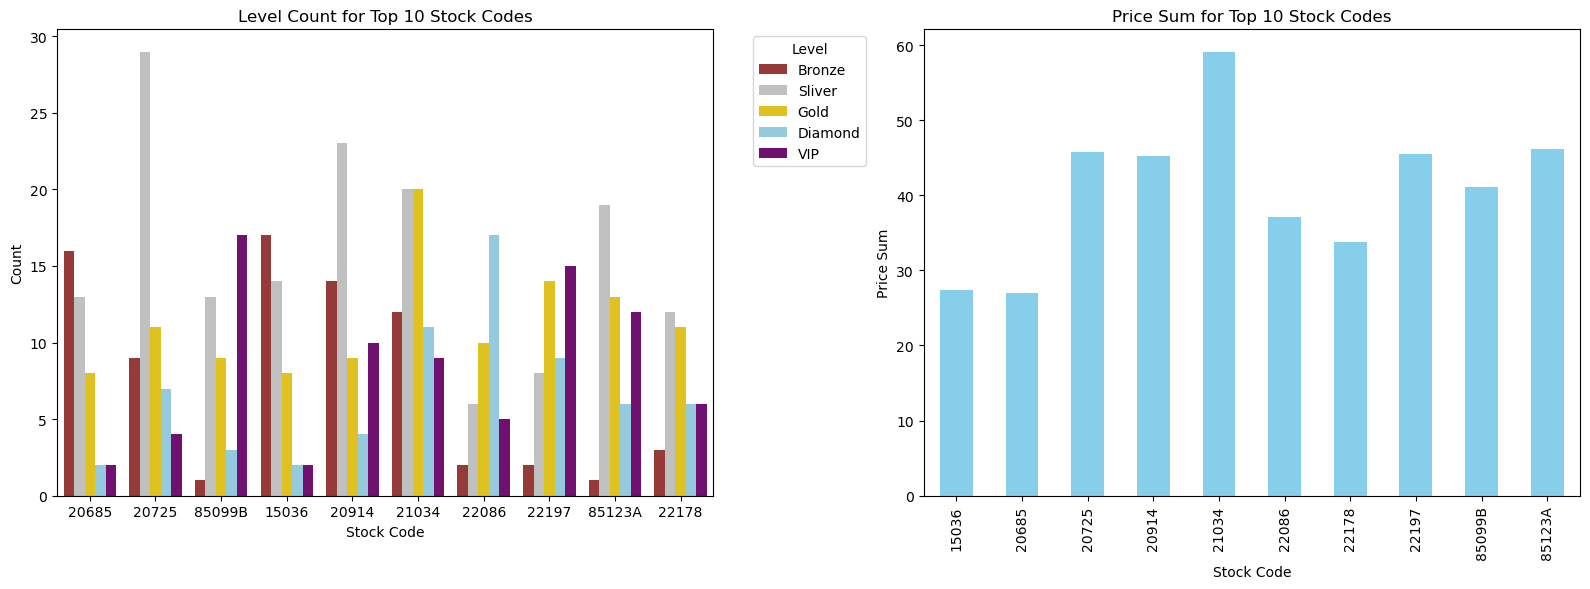

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 10개 상품 코드 추출
top_codes = real_df['code'].value_counts().index[:10]
filtered_df = real_df[real_df['code'].isin(top_codes)]

# Stock Code 별 Level Count 및 Price 합산 결과
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stock Code 별 Level Count 차트
colors = {'Bronze': 'brown', 'Sliver': 'silver', 'Gold': 'gold', 'Diamond': 'skyblue', 'VIP': 'purple'}
order_columns = ['Bronze', 'Sliver', 'Gold', 'Diamond', 'VIP']

sns.countplot(ax=axes[0], x='code', hue='Level', data=filtered_df, palette=colors, hue_order=order_columns)
axes[0].set_title('Level Count for Top 10 Stock Codes')
axes[0].set_xlabel('Stock Code')
axes[0].set_ylabel('Count')
axes[0].legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stock Code의 RFM 합산 결과 차트
price_sum = filtered_df.groupby('code')['TotalScore'].sum()
price_sum.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Price Sum for Top 10 Stock Codes')
axes[1].set_xlabel('Stock Code')
axes[1].set_ylabel('Price Sum')

plt.tight_layout()
plt.show()


### 상품별 마케팅 전략
- 21034 코드를 가지는  상품의 경우 실버 등급과 골드 등급 회원들의 분포수가 높은 것을 보아 가장 인기 상품인 것으로 추측 할 수 있습니다. 오른쪽 그래프 역시 21034 상품의 RFM 점수가 가장 높은 것을 볼 수 있습니다.
- 그리고 20725 코드를 가지는 제품 또한 실버 등급의 회원들의 분포수가 압도적으로 많은 것을 확인 할 수 있으며, 이를 미루어보았을때 대중적인 상품인것으로 확인 할 수 있습니다. 위 두 해당 상품의 인기를 바탕으로 관련 상품 또는 부가 상품을 함께 마케팅하여 상호 보완적인 상품 판매를 유도할 수 있습니다.
  
- 그리고 85099B, 22197, 22086 상품들은 VIP 등급 및 다이아몬드 등급의 분포수가 가장 높은 것을 볼 수 있습니다.
  이를 보았을때, 이러한 상품들은 브랜드 이미지나 품질 등에 대한 높은 평가를 받고 있을 가능성이 있으며, 이를 바탕으로 추가적인 마케팅 및 프로모션 활동을 통해 이들 회원들의 충성도를 높일 수 있습니다.

> 이러한 전략들을 통해 상품의 인기도를 높이고 고객들의 만족도를 높이며, 결과적으로 매출을 증대할 수 있습니다.'